# Probability Distributions

## Random Variables

In [20]:
#Listing 3.1: A simple random variable
using StatsBase, Plots; pyplot()
names = ["Mary","Mel","David","John","Kayley","Anderson"]
randomName() = rand(names)
X = 3:8
N = 10^6
sampleLengths = [length(randomName()) for _ in 1:N]

1000000-element Array{Int64,1}:
 3
 8
 5
 4
 4
 5
 6
 8
 4
 5
 4
 6
 4
 ⋮
 6
 4
 5
 8
 4
 6
 4
 8
 3
 8
 6
 4

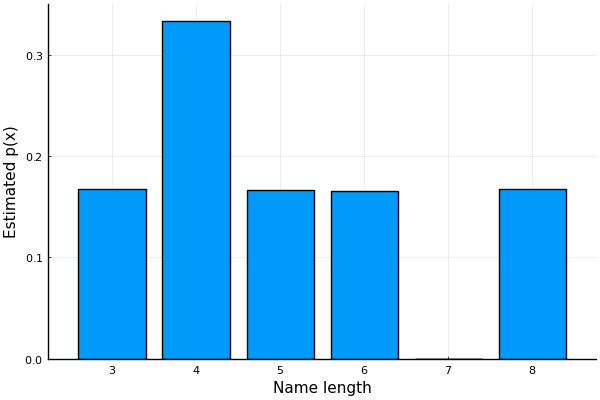

In [21]:
bar(X, counts(sampleLengths)/N, ylims=(0,0.35), xlabel="Name length", ylabel="Estimated p(x)", legend=:none)

### Types of Random Variables

In [22]:
# using Pkg;
# Pkg.add("Measures")

In [23]:
# Listing 3.2: Plotting discrete and continuous distributions
using Plots, Measures; pyplot()

pDiscrete = [0.25, 0.25, 0.5]
xGridD = 0:2

0:2

In [24]:
pContinuous(x) = 3/4*(1 - x^2)
xGridC = -1:0.01:1

-1.0:0.01:1.0

In [25]:
pContinuous2(x) = x < 0 ? x+1 : 1-x

pContinuous2 (generic function with 1 method)

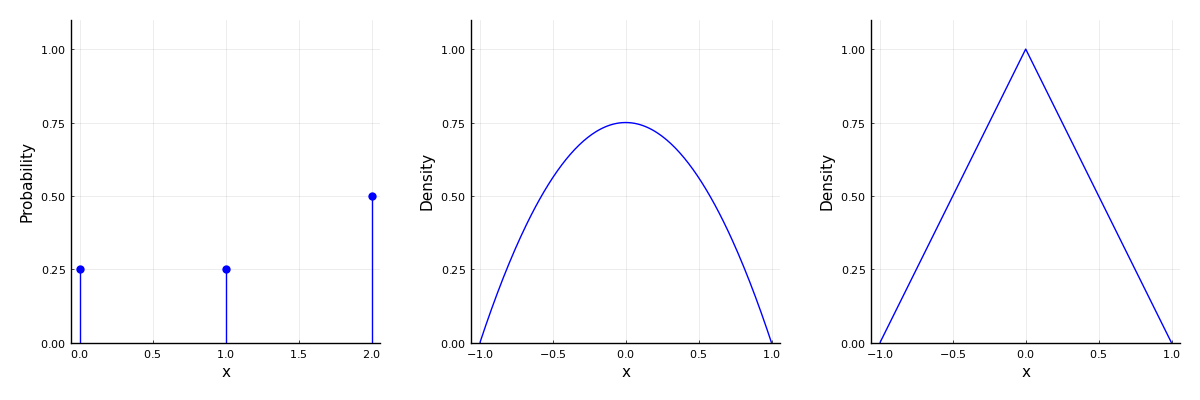

In [26]:
p1 = plot(xGridD, line=:stem, pDiscrete, marker=:circle, c=:blue, ms=6, msw=0)
p2 = plot(xGridC, pContinuous.(xGridC), c=:blue)
p3 = plot(xGridC, pContinuous2.(xGridC), c=:blue)
plot(p1, p2, p3, layout=(1,3), legend=false, ylims=(0,1.1), xlabel="x",
    ylabel=["Probability" "Density" "Density"], size=(1200, 400), margin=5mm)

## Moment Based Descriptors

### Mean

In [27]:
# using Pkg;
# Pkg.add("QuadGK")

In [28]:
# Listing 3.3: Expectation via numerical integration
using QuadGK

sup = (-1,1)
f1(x) = 3/4*(1-x^2)
f2(x) = x < 0 ? x+1 : 1-x

f2 (generic function with 1 method)

In [29]:
expect(f, support) = quadgk((x) -> x*f(x), support...)[1]

expect (generic function with 1 method)

In [30]:
println("Mean 1: ", expect(f1,sup))

Mean 1: 0.0


In [31]:
println("Mean 2: ", expect(f2,sup))

Mean 2: -2.0816681711721685e-17


### Variance

In [32]:
# using Pkg;
# Pkg.add("Distributions")

In [33]:
# Listing 3.4: Variance of X as the mean of Y
using Distributions, Plots; pyplot()

Plots.PyPlotBackend()

In [34]:
dist = TriangularDist(4,6,5)
N = 10^6
data = rand(dist, N)
yData = (data .- 5) .^2

1000000-element Array{Float64,1}:
 0.4822817355188593
 0.023047474600081486
 0.04324011125103666
 1.575949181391064e-5
 0.04694612851592093
 0.0038682586765129913
 0.005061321458677098
 0.018721850144399775
 0.00831040532145425
 0.08840127692495806
 0.4551348124272253
 0.2231605702772477
 0.6096283854851436
 ⋮
 0.32242183693125626
 0.2556079249216382
 0.269345398467898
 0.051517161733821724
 0.003034437203901214
 0.009425392504815878
 0.04480837254858249
 0.20235554327097524
 0.07376540681742504
 0.36542186789380915
 0.3674383694828812
 0.0018941606819482255

In [35]:
println("Mean: ", mean(yData), " Variance: ", var(data))

Mean: 0.16664551392027346 Variance: 0.16664530791810558


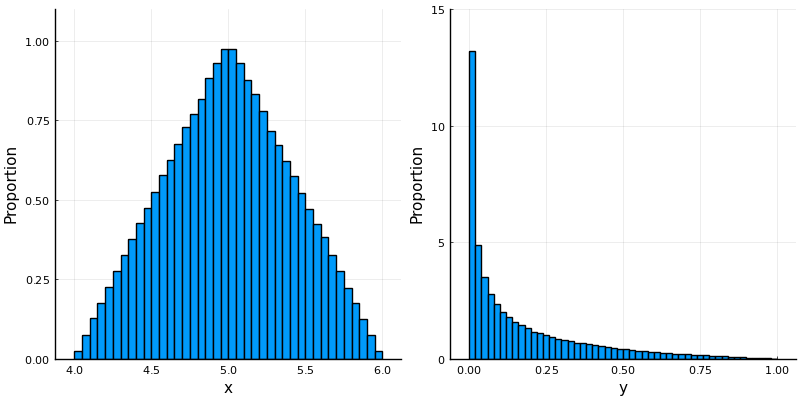

In [36]:
p1 = histogram(data, xlabel="x", bins=80, normed=true, ylims=(0,1.1))
p2 = histogram(yData, xlabel="y", bins=80, normed=true, ylims=(0,15))
plot(p1, p2, ylabel="Proportion", size=(800, 400), legend=:none)

## Functions Describing Distributions

### Cumulative Probabilities

In [37]:
# Listing 3.5: CDF from the Riemann sum of a PDF
using Plots, LaTeXStrings; pyplot()

Plots.PyPlotBackend()

In [46]:
f2(x) = (x<0 ? x+1 : 1-x)*(abs(x)<1 ? 1 : 0)
a, b = -1.5, 1.5
delta = 0.01

F(x) = sum([f2(u)*delta for u in a:delta:x])

F (generic function with 1 method)

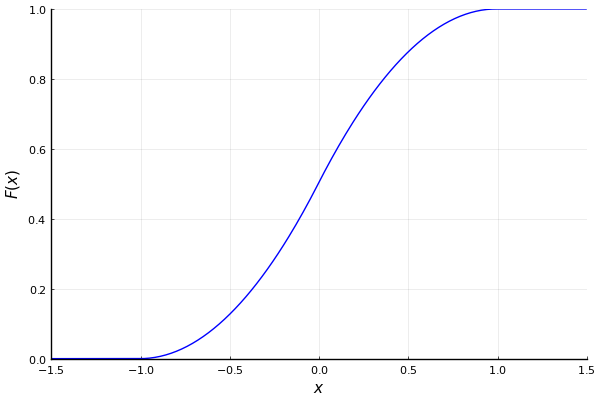

In [47]:
xGrid = a:delta:b
y = [F(u) for u in xGrid]
plot(xGrid, y, c=:blue, xlims=(a,b), ylims=(0,1), 
	xlabel=L"x", ylabel=L"F(x)", legend=:none)